In [3]:
import pandas as pd

# IMPORTANT: Replace the path below with the correct one for your file
df = pd.read_csv("C:\\Users\\Ishan\\Downloads\\Train.csv")

# Print the first 5 rows in a readable format
print("--- First 5 Rows ---")
print(df.head().to_markdown())

# Print the count of missing values
print("\n--- Missing Values Count ---")
print(df.isnull().sum().to_markdown())

--- First 5 Rows ---
|    | Item_Identifier   |   Item_Weight | Item_Fat_Content   |   Item_Visibility | Item_Type             |   Item_MRP | Outlet_Identifier   |   Outlet_Establishment_Year | Outlet_Size   | Outlet_Location_Type   | Outlet_Type       |   Item_Outlet_Sales |
|---:|:------------------|--------------:|:-------------------|------------------:|:----------------------|-----------:|:--------------------|----------------------------:|:--------------|:-----------------------|:------------------|--------------------:|
|  0 | FDA15             |          9.3  | Low Fat            |         0.0160473 | Dairy                 |   249.809  | OUT049              |                        1999 | Medium        | Tier 1                 | Supermarket Type1 |            3735.14  |
|  1 | DRC01             |          5.92 | Regular            |         0.0192782 | Soft Drinks           |    48.2692 | OUT018              |                        2009 | Medium        | Tier 3                

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [5]:
# --- Part A (Corrected Code) ---

# First, get the average weight for each item identifier
item_avg_weight = df.groupby('Item_Identifier')['Item_Weight'].mean()

# Now, use this to fill the missing weights
# We use .transform() which is a more robust way to handle this
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

# Check if any missing values remain (for items that had no weight info at all)
remaining_nulls = df['Item_Weight'].isnull().sum()

# If there are still nulls (like for FDN52), fill them with the overall mean weight
if remaining_nulls > 0:
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Final check to confirm all missing values are gone
print("Missing values in 'Item_Weight' after imputation:", df['Item_Weight'].isnull().sum())

Missing values in 'Item_Weight' after imputation: 0


In [6]:
# Find the mode of 'Outlet_Size' for each 'Outlet_Type'
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

# Get a boolean series for missing Outlet_Size
miss_bool = df['Outlet_Size'].isnull()

# Impute the missing values
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

# Check if there are any missing values left
print("\nMissing values in 'Outlet_Size' after imputation:", df['Outlet_Size'].isnull().sum())


Missing values in 'Outlet_Size' after imputation: 0


In [7]:
# Replace 0s in 'Item_Visibility' with the column's mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

# Standardize the 'Item_Fat_Content' categories
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

print("\n'Item_Visibility' contains 0s:", sum(df['Item_Visibility']==0))
print("\nUnique values in 'Item_Fat_Content':")
print(df['Item_Fat_Content'].value_counts().to_markdown())


'Item_Visibility' contains 0s: 0

Unique values in 'Item_Fat_Content':
| Item_Fat_Content   |   count |
|:-------------------|--------:|
| Low Fat            |    5517 |
| Regular            |    3006 |


In [8]:
# Create a new feature from the first two characters of 'Item_Identifier'
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])

# Map these new codes to more descriptive names
df['New_Item_Type'] = df['New_Item_Type'].map({
    'FD': 'Food',
    'NC': 'Non-Consumable',
    'DR': 'Drinks'
})

print("--- Value Counts for New_Item_Type ---")
print(df['New_Item_Type'].value_counts().to_markdown())

--- Value Counts for New_Item_Type ---
| New_Item_Type   |   count |
|:----------------|--------:|
| Food            |    6125 |
| Non-Consumable  |    1599 |
| Drinks          |     799 |


In [9]:
# Mark 'Non-Consumable' items as 'Non-Edible' in the fat content column
df.loc[df['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

print("\n--- Value Counts for Item_Fat_Content (Corrected) ---")
print(df['Item_Fat_Content'].value_counts().to_markdown())


--- Value Counts for Item_Fat_Content (Corrected) ---
| Item_Fat_Content   |   count |
|:-------------------|--------:|
| Low Fat            |    3918 |
| Regular            |    3006 |
| Non-Edible         |    1599 |


In [10]:
# Calculate the age of the outlet based on the year 2024
df['Outlet_Years'] = 2024 - df['Outlet_Establishment_Year']

print("\n--- First 5 Rows with New Features ---")
print(df[['Item_Identifier', 'New_Item_Type', 'Item_Fat_Content', 'Outlet_Establishment_Year', 'Outlet_Years']].head().to_markdown())


--- First 5 Rows with New Features ---
|    | Item_Identifier   | New_Item_Type   | Item_Fat_Content   |   Outlet_Establishment_Year |   Outlet_Years |
|---:|:------------------|:----------------|:-------------------|----------------------------:|---------------:|
|  0 | FDA15             | Food            | Low Fat            |                        1999 |             25 |
|  1 | DRC01             | Drinks          | Regular            |                        2009 |             15 |
|  2 | FDN15             | Food            | Low Fat            |                        1999 |             25 |
|  3 | FDX07             | Food            | Regular            |                        1998 |             26 |
|  4 | NCD19             | Non-Consumable  | Non-Edible         |                        1987 |             37 |


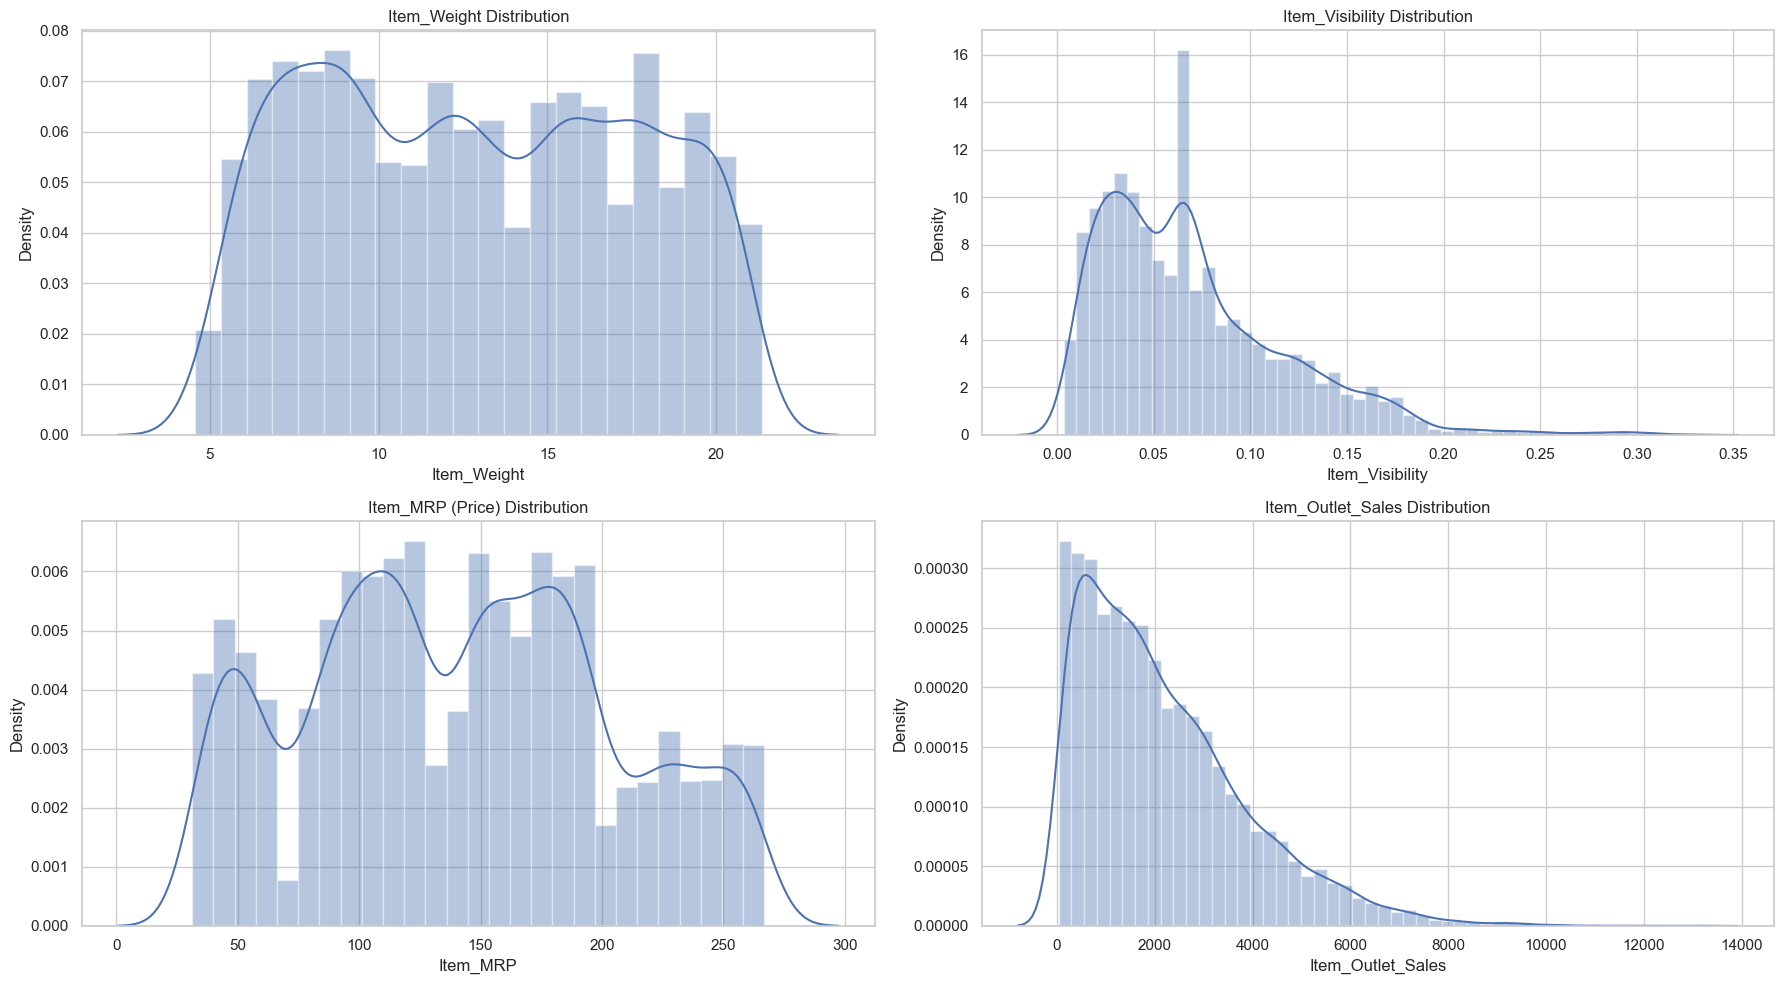

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
plt.figure(figsize=(18, 10))

# Plot 1: Item_Weight distribution
plt.subplot(2, 2, 1)
sns.distplot(df['Item_Weight'])
plt.title('Item_Weight Distribution')

# Plot 2: Item_Visibility distribution
plt.subplot(2, 2, 2)
sns.distplot(df['Item_Visibility'])
plt.title('Item_Visibility Distribution')

# Plot 3: Item_MRP distribution
plt.subplot(2, 2, 3)
sns.distplot(df['Item_MRP'])
plt.title('Item_MRP (Price) Distribution')

# Plot 4: Item_Outlet_Sales distribution
plt.subplot(2, 2, 4)
sns.distplot(df['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales Distribution')

plt.tight_layout()
plt.show()

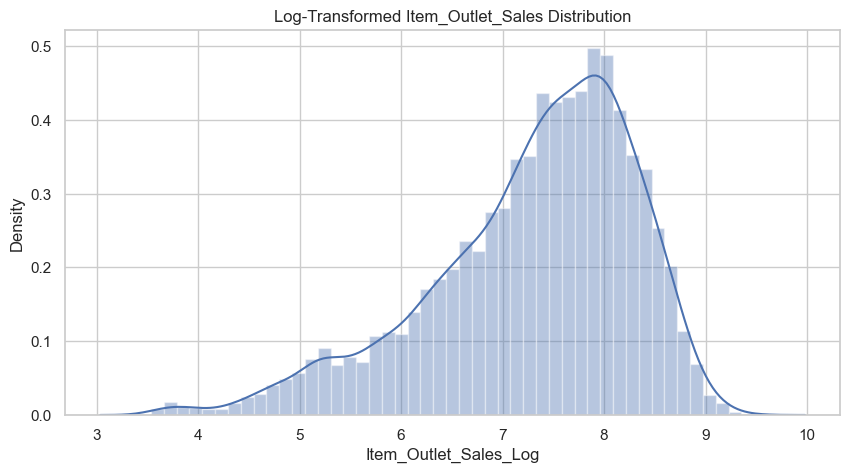

In [15]:
# Apply log transformation to reduce skewness
df['Item_Outlet_Sales_Log'] = np.log1p(df['Item_Outlet_Sales'])

# Plot the new distribution
plt.figure(figsize=(10, 5))
sns.distplot(df['Item_Outlet_Sales_Log'])
plt.title('Log-Transformed Item_Outlet_Sales Distribution')
plt.show()

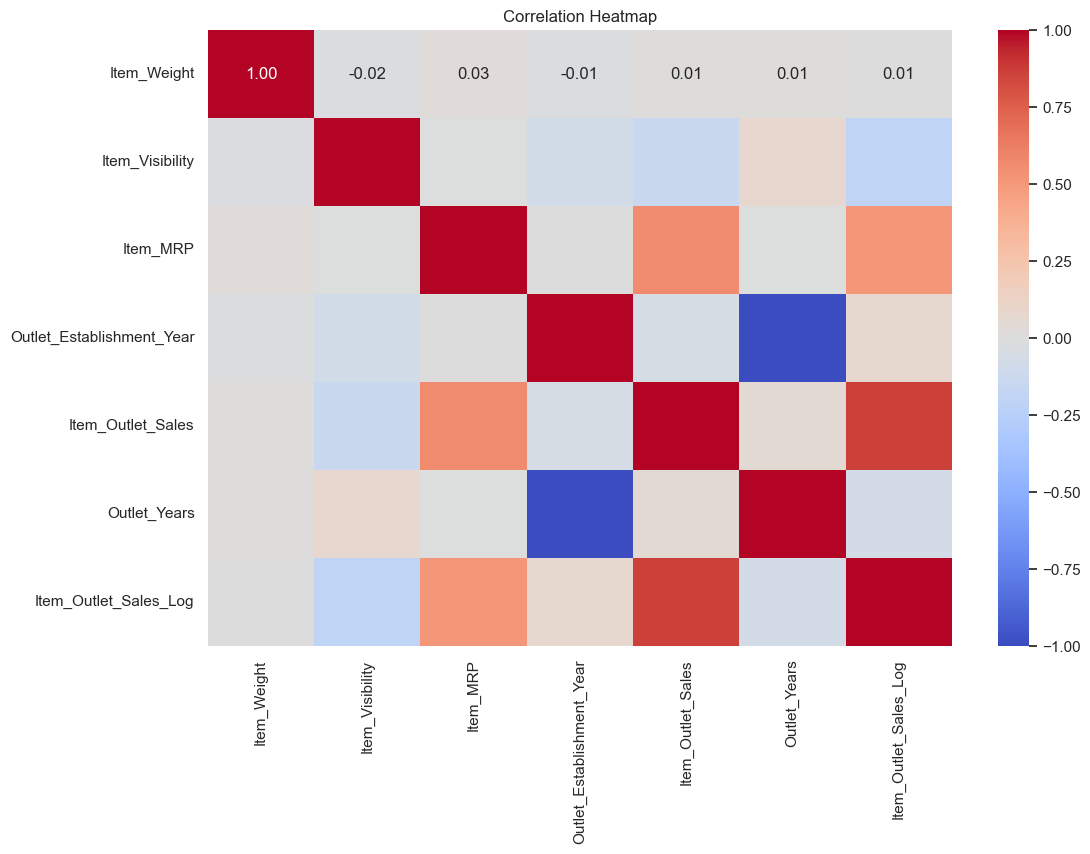

In [17]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

# Apply Label Encoding to each column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# We also need to encode the Outlet_Identifier as it might have predictive value
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

print("--- First 5 Rows After Label Encoding ---")
# Select a few columns to display the changes
display_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet', 'New_Item_Type']
print(df[display_cols].head().to_markdown())

--- First 5 Rows After Label Encoding ---
|    |   Item_Fat_Content |   Outlet_Size |   Outlet |   New_Item_Type |
|---:|-------------------:|--------------:|---------:|----------------:|
|  0 |                  0 |             1 |        9 |               1 |
|  1 |                  2 |             1 |        3 |               0 |
|  2 |                  0 |             1 |        9 |               1 |
|  3 |                  2 |             2 |        0 |               1 |
|  4 |                  1 |             0 |        1 |               2 |


In [19]:
# Apply one-hot encoding using get_dummies
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'], dtype=int)

print("\n--- Shape of the DataFrame After One-Hot Encoding ---")
print(df.shape)

print("\n--- First 5 Rows of the Final Processed Data ---")
print(df.head().to_markdown())


--- Shape of the DataFrame After One-Hot Encoding ---
(8523, 27)

--- First 5 Rows of the Final Processed Data ---
|    | Item_Identifier   |   Item_Weight |   Item_Visibility |   Item_Type |   Item_MRP | Outlet_Identifier   |   Outlet_Establishment_Year |   Item_Outlet_Sales |   Outlet_Years |   Item_Outlet_Sales_Log |   Outlet |   Item_Fat_Content_0 |   Item_Fat_Content_1 |   Item_Fat_Content_2 |   Outlet_Size_0 |   Outlet_Size_1 |   Outlet_Size_2 |   Outlet_Location_Type_0 |   Outlet_Location_Type_1 |   Outlet_Location_Type_2 |   Outlet_Type_0 |   Outlet_Type_1 |   Outlet_Type_2 |   Outlet_Type_3 |   New_Item_Type_0 |   New_Item_Type_1 |   New_Item_Type_2 |
|---:|:------------------|--------------:|------------------:|------------:|-----------:|:--------------------|----------------------------:|--------------------:|---------------:|------------------------:|---------:|---------------------:|---------------------:|---------------------:|----------------:|----------------:|--------

In [20]:
# Define the feature set (X) by dropping columns that shouldn't be used for training
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Outlet_Sales_Log'])

# Define the target variable (y), using the log-transformed sales
y = df['Item_Outlet_Sales_Log']

print("\n--- Shape of our Features (X) ---")
print(X.shape)

print("\n--- Shape of our Target (y) ---")
print(y.shape)


--- Shape of our Features (X) ---
(8523, 22)

--- Shape of our Target (y) ---
(8523,)


In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def train(model, X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # --- Cross-Validation ---
    # Perform 5-fold cross-validation to get a robust estimate of performance
    # We use 'neg_mean_squared_error' as lower is better
    cv_score_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score_mse = np.mean(np.abs(cv_score_mse)) # Take absolute mean

    # We also use R-squared score (closer to 1 is better)
    cv_score_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)
    cv_score_r2 = np.mean(cv_score_r2)

    print("="*50)
    print("Model Report")
    print(f"Cross-Validation Mean Squared Error: {cv_score_mse:.4f}")
    print(f"Cross-Validation R2 Score: {cv_score_r2:.4f}")

    # --- Final R2 Score on Test Set ---
    # This helps check for overfitting
    test_r2 = r2_score(y_test, y_pred)
    print(f"R2 Score on Test Data: {test_r2:.4f}")
    print("="*50)

In [ ]:
# 1. Linear Regression (Baseline Model)
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
print("--- Linear Regression ---")
train(model_lr, X, y)

# 2. Ridge Regression
from sklearn.linear_model import Ridge
model_ridge = Ridge()
print("\n--- Ridge Regression ---")
train(model_ridge, X, y)

# 3. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators is a common parameter to set
print("\n--- Random Forest Regressor ---")
train(model_rf, X, y)

# 4. LightGBM Regressor
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(random_state=42, verbosity=-1)
print("\n--- LightGBM Regressor ---")
train(model_lgbm, X, y)

# 5. XGBoost Regressor
from xgboost import XGBRegressor
model_xgb = XGBRegressor(random_state=42)
print("\n--- XGBoost Regressor ---")
train(model_xgb, X, y)